<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2020 -->
# Project 1 on Machine Learning, deadline October 4, 2020
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 10, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

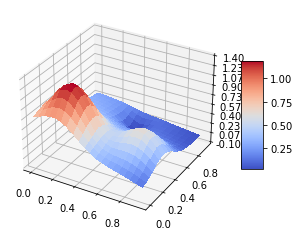

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)


# Plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Exercise 1: Ordinary Least Square (OLS) on the (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $\cal{N}(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.




In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd




def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x, y, n ):
    L = ['1']
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
            if (i == 0 and k == 0) :
                L.append('1')
            elif(i-k == 0):
                L.append('Y^' + str(k))
            elif (k == 0):
                L.append('X^' + str(i-k))
            elif (i==2 and k == 1):
                L.append('XY')
            elif(i-k == 1):
                L.append('X'+'Y^' + str(k))
            elif (k == 1):
                L.append('X^' + str(i-k)+'Y')
            else :
                L.append('X^' + str(i-k)+'Y^'+ str(k))
    return X, L

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunctionWithNoise(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x))
    return term1 + term2 + term3 + term4 + noise.reshape(len(x), len(x))

Polynomial degree: 1
MSE training :  0.03157814975441052
MSE test :  0.03786620554464389
R2 training :  0.666378848667796
R2 test :  0.5552789447042453

 

Polynomial degree: 2
MSE training :  0.02512785984910036
MSE test :  0.026771114988789
R2 training :  0.7345257528205799
R2 test :  0.6855856472013928

 

Polynomial degree: 3
MSE training :  0.017000558549305683
MSE test :  0.01686357484534123
R2 training :  0.8203901760989738
R2 test :  0.8019451198394527

 

Polynomial degree: 4
MSE training :  0.013431612714675172
MSE test :  0.014883867089805691
R2 training :  0.8580958627098685
R2 test :  0.8251958709922439

 

Polynomial degree: 5
MSE training :  0.011142443627806259
MSE test :  0.014264720003921982
R2 training :  0.8822807890685964
R2 test :  0.832467466903613

 

Polynomial degree: 6
MSE training :  0.010032083566172195
MSE test :  0.012555838347632164
R2 training :  0.8940116727662365
R2 test :  0.8525374908901664

 

Polynomial degree: 7
MSE training :  0.0092824305875810

,1,X^1,Y^1,X^2,XY,Y^2,X^3,X^2Y,XY^2,Y^3,...,X^9Y,X^8Y^2,X^7Y^3,X^6Y^4,X^5Y^5,X^4Y^6,X^3Y^7,X^2Y^8,XY^9,Y^10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.960231,-0.506790,-0.641524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.052787,-0.642626,-0.646817,-0.251534,0.785771,-0.393577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.860242,0.223756,1.268761,-2.317705,0.946989,-5.692539,1.155372,0.723161,-0.862687,3.809522,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.632200,3.671562,2.773368,-15.800636,-2.708542,-10.845689,19.387328,7.623855,2.252662,10.465768,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.568529,6.054849,2.017597,-28.542240,-7.394479,-1.541982,43.211523,26.447897,9.589399,-21.908856,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.662247,0.826694,1.224997,17.683596,4.194884,6.568558,-119.467793,-40.756809,4.888044,-61.177955,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.773438,-3.136462,-1.070734,47.644094,47.372411,20.951929,-225.076861,-241.444925,-134.842263,-107.347925,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.819055,0.258071,-6.391728,-18.491374,79.085938,84.478764,207.194808,-193.258876,-517.884590,-402.657635,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.773347,5.942387,-2.377555,-129.419727,32.808003,0.491844,1099.354281,257.354407,-251.746981,334.599251,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


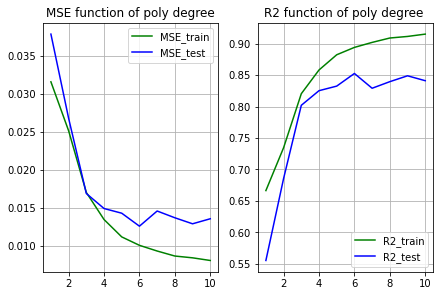

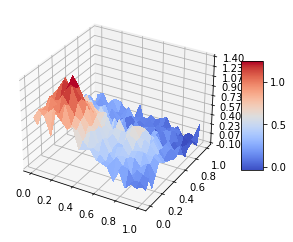

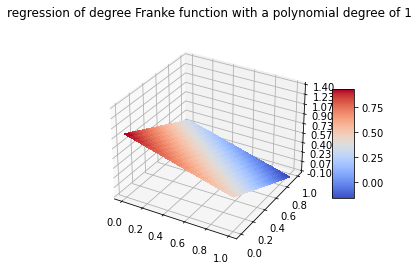

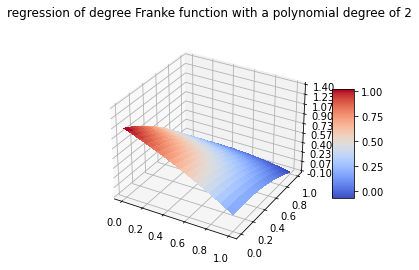

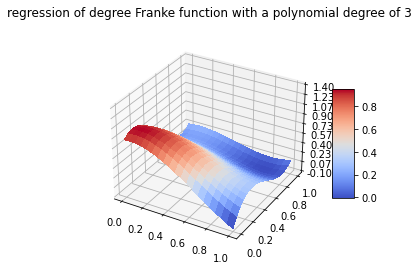

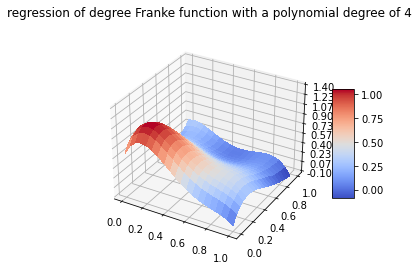

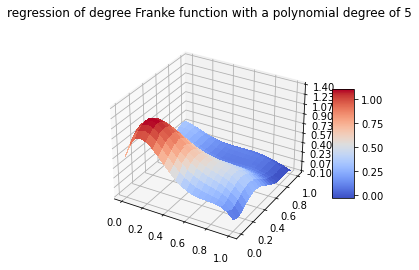

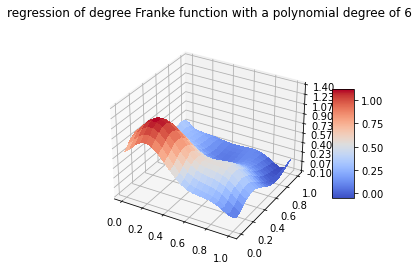

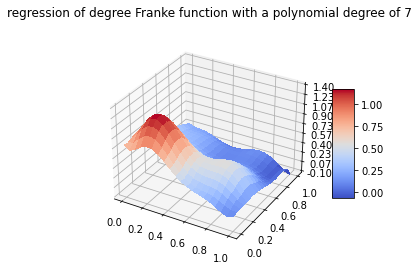

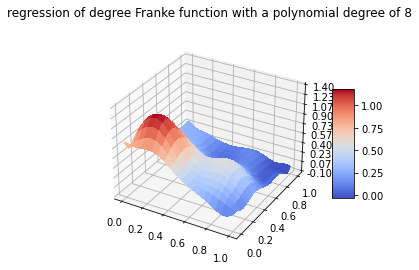

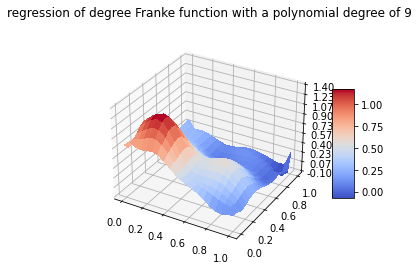

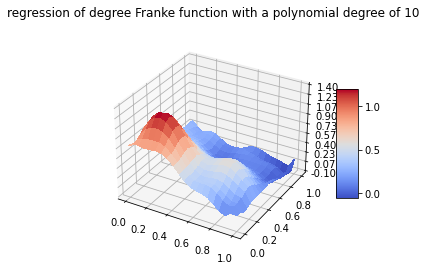

In [2]:

################# Parameters #################

n = 20  #number of data
DegreeMax = 10

#############################################

x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x, y)
z = FrankeFunctionWithNoise(x, y)

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x.ravel()
x_y[:, 1] = y.ravel()
x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)

Liste_degree = range(1, DegreeMax +1)
MSE_train = []
MSE_test = []
R2_train = []
R2_test = []


coeff = int((DegreeMax+1)*(DegreeMax+2)/2)
BETA = np.zeros((DegreeMax+1, coeff))

fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

for poly in Liste_degree:

    X_train, coeff = create_X(x_y_train[:, 0], x_y_train[:, 1], poly )
    X_test, coeff = create_X(x_y_test[:, 0], x_y_test[:, 1], poly )
    X , coeff = create_X(x, y, poly)
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

    ztildeOLS = X_train @ beta
    ztestOLS = X_test @ beta
    zplot = X @ beta
    zplot = zplot.reshape(len(x), len(x))

    for j in range(len(beta)):
        BETA[poly][j] = beta[j]

    MSE_train.append(MSE(z_train, ztildeOLS))
    MSE_test.append(MSE(z_test, ztestOLS))
    R2_train.append(R2(z_train, ztildeOLS))
    R2_test.append(R2(z_test, ztestOLS))

    degree = poly
    print("Polynomial degree:", degree)
    print("MSE training : ", MSE_train[degree - 1])
    print("MSE test : ", MSE_test[degree - 1])
    print("R2 training : ", R2_train[degree - 1])
    print("R2 test : ", R2_test[degree - 1])
    print("\n \n")

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, zplot, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.suptitle("regression of degree Franke function with a polynomial degree of " + str(degree))
    fig.colorbar(surf, shrink=0.5, aspect=5)


axs[0].plot(Liste_degree, MSE_train, 'green', label='MSE_train')
axs[0].plot(Liste_degree, MSE_test, 'blue', label='MSE_test')
axs[0].set_title("MSE function of poly degree")
axs[0].legend()
axs[0].grid()

axs[1].plot(Liste_degree, R2_train, 'green', label="R2_train")
axs[1].plot(Liste_degree, R2_test, 'blue', label="R2_test")
axs[1].set_title("R2 function of poly degree ")
axs[1].legend()
axs[1].grid()

print("---------------------------- beta coefficient for each polynomial degree ----------------------------")
DesignMatrix = pd.DataFrame(BETA)
DesignMatrix.columns = coeff
display(DesignMatrix)

plt.show()